<a href="https://colab.research.google.com/github/elvissoares/EQE595-SimMol/blob/main/notebooks/2_Lennard-Jones_Cond_Contorno_Periodica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula Prática 02 - Interação de Lennard-Jones e Condição de Contorno Periódica

Autor: [Prof. Elvis do A. Soares](https://github.com/elvissoares)

Contato: [elvis@peq.coppe.ufrj.br](mailto:elvis@peq.coppe.ufrj.br) - [Programa de Engenharia Química, PEQ/COPPE, UFRJ, Brasil](https://www.peq.coppe.ufrj.br/)

---

In [1]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt

## Interação de Lennard-Jones

Para duas partículas interagindo, o potencial de interação Lennard-Jones é dada por

$$u(r) = 4\epsilon\left[ \left(\frac{\sigma}{r} \right)^{12}-\left(\frac{\sigma}{r} \right)^{6}\right] $$

com
- $r$: distância entre partículas
- $\epsilon$: energia de interação atrativa;
- $\sigma$: distância de aproximação mínima.

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Implemente a função que calcula a interação de LJ entre duas partículas

In [2]:
def ulj(r,epsilon=1.0,sigma=1.0):
    sigma_r_6 = (sigma/r)**6
    return 4*epsilon*(sigma_r_6**2-sigma_r_6)

Gráfico do potencial de interação

Text(0, 0.5, '$u(r)$')

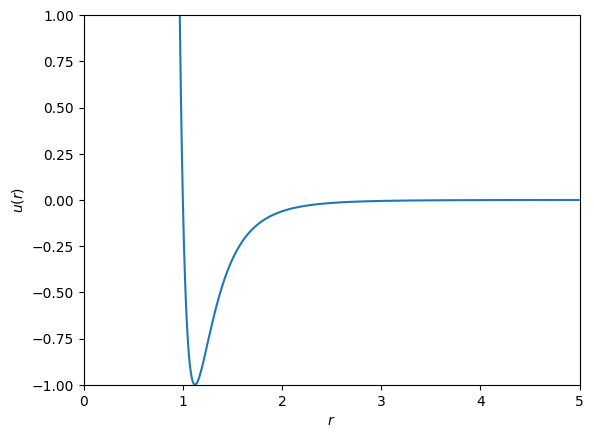

In [3]:
r = np.arange(0.01,5,0.01)

plt.plot(r,ulj(r))
# limite dos eixos
plt.ylim(-1,1)
plt.xlim(0,5)

# nome dos eixos
plt.xlabel(r'$r$')
plt.ylabel(r'$u(r)$')

## 3 partículas interagindo

In [4]:
# triângulo equilatero de tamanho l
l = 1.5

r1 = np.array([0.0,0.0]) # posição x e y
r2 = np.array([l,0.0])
r3 = np.array([l/2,l*np.sqrt(3)/2])

Gráfico das 3 partículas

Text(0, 0.5, 'y')

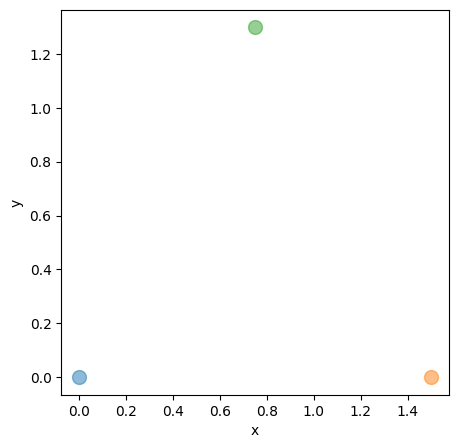

In [5]:
plt.figure(figsize=(5,5)) # faz com que a figura seja quadrada
plt.plot(r1[0],r1[1],'o',ms=10.0,alpha=0.5)
plt.plot(r2[0],r2[1],'o',ms=10.0,alpha=0.5)
plt.plot(r3[0],r3[1],'o',ms=10.0,alpha=0.5)

# plt.xlim(0,l)
# plt.ylim(0,l)

plt.xlabel('x')
plt.ylabel('y')

Calculando distâncias

In [6]:
r2-r1

array([1.5, 0. ])

In [12]:
r12 = np.linalg.norm(r2-r1)

In [13]:
r3-r1

array([0.75      , 1.29903811])

In [14]:
r13 = np.linalg.norm(r3-r1)

In [15]:
r3-r2

array([-0.75      ,  1.29903811])

In [16]:
r23 = np.linalg.norm(r3-r2)

Calculando energia entre pares

In [20]:
u12 = ulj(r12)

print(u12)

-0.3203365942785745


In [21]:
u13 = ulj(r13)

print(u13)

-0.3203365942785745


In [22]:
u23 = ulj(r23)

print(u23)

-0.3203365942785745


Energia total

In [23]:
Utot = u12 + u13 + u23

print(Utot)

-0.9610097828357236


**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Crie uma função que distribua as 3 partículas num triângulo de lado $l$ e calcule a energia total de LJ

In [24]:
def triangulo(l):
  # posiciona as partículas
  r1 = np.array([0.0,0.0]) # posição x e y
  r2 = np.array([l,0.0])
  r3 = np.array([l/2,l*np.sqrt(3)/2])

  # calcula a distância entre os pares
  r12 = np.linalg.norm(r2-r1)
  r13 = np.linalg.norm(r3-r1)
  r23 = np.linalg.norm(r3-r2)

  # calcula a energia entre pares
  u12 = ulj(r12)
  u13 = ulj(r13)
  u23 = ulj(r23)

  # calcula a energia total
  Utot = u12 + u13 + u23

  return Utot

In [25]:
Utot = triangulo(1.5)

print(Utot)

-0.9610097828357236


**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Varie o comprimento $l$ e determine qual o valor para que a energia total seja mínima

Text(0.5, 1.0, 'Energia Total de LJ num triângulo')

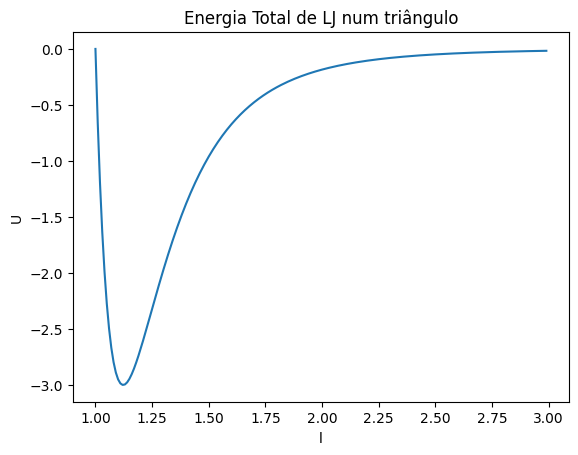

In [63]:
# array com tamanhos do triangulo
larray = np.arange(1.0,3.0,0.01)
# array de energias totais
Uarray = np.zeros_like(larray)

for i, l in enumerate(larray):
  Uarray[i] = triangulo(l)

# grafico de U como função de l
plt.plot(larray,Uarray)
plt.xlabel('l')
plt.ylabel('U')
plt.title('Energia Total de LJ num triângulo')


## Energia total de várias partículas

No caso de termos $N$ partículas, podemos calcular a energia total como sendo

$$U = \frac{1}{2}\sum_{i=1}^N \sum_{j \neq i}^N u(r_{ij}) = \sum_{i=1}^N \sum_{j > i}^N u(r_{ij})$$

com
- $r_{ij} = |\boldsymbol{r}_i - \boldsymbol{r}_j|$: distância entre as duas partículas



**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Mostre que para 3 partículas a energia total se reduz ao calculado no item anterior

In [30]:
def triangulo_esperto(l):
  Np = 3 # numero de particulas
  # posiciona as partículas
  r = np.zeros((Np,2))
  r[0] = np.array([0.0,0.0]) # posição x e y
  r[1] = np.array([l,0.0])
  r[2] = np.array([l/2,l*np.sqrt(3)/2])

  Utot = 0.0
  for i in range(Np):
    for j in range(i+1,Np):
      # calcula a distância entre os pares
      rij = np.linalg.norm(r[i]-r[j])
      # calcula a energia entre pares
      uij = ulj(rij)
      # soma a energia total
      Utot += uij

  return Utot

In [31]:
Utot = triangulo_esperto(1.5)

print(Utot)

-0.9610097828357236


## Partículas em uma rede quadrada 2D

Número de partículas

In [32]:
Np = 36

Tamanho da rede

In [33]:
L = 10.0

Vamos distribuir as partículas de forma uniforme ao longo da caixa usando a função `meshgrid`

In [38]:
def rede_quadrada(Np, L):
    # array como posições das partículas
    r = np.zeros((Np,2))
    # Número de pontos em x e y
    Nx = Ny= int(np.ceil(np.sqrt(Np)))

    # Espaçamento entre as particulas
    dx = L/Nx
    dy = L/Ny

    # Posições possíveis em x e y
    id = 0
    for i in range(Nx):
        for j in range(Ny):
            if (id < Np):
                r[id][0] = (i+0.5)*dx
                r[id][1] = (j+0.5)*dy
                id +=1
    return r

In [39]:
r = rede_quadrada(Np,L)

Figuras com as posições das partículas

Text(0, 0.5, 'y')

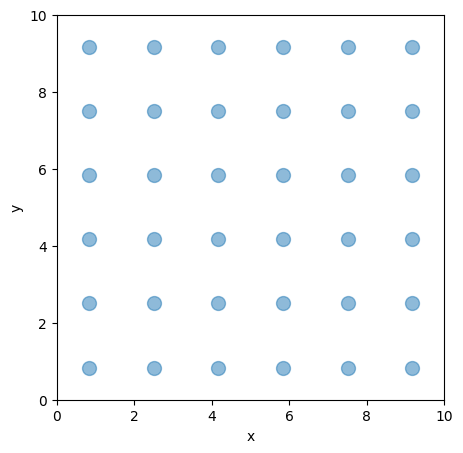

In [40]:
plt.figure(figsize=(5,5)) # faz com que a figura seja quadrada
plt.plot(r[:,0],r[:,1],'o',ms=10.0,alpha=0.5)

plt.xlim(0,L)
plt.ylim(0,L)

plt.xlabel('x')
plt.ylabel('y')

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Crie a função que calcula a interação entre todas as partículas da rede quadrada

In [43]:
def interacao_total(r,epsilon=1.0,sigma=1.0):
    U = 0.0
    for i in range(r.shape[0]): # r.shape[0] = Np
        for j in range(i+1,r.shape[0]):
            # calcula distancia entre duas particulas
            rij = np.linalg.norm(r[i]-r[j])
            # calcula energia interna
            U += ulj(rij,epsilon,sigma)
    return U

Valor da interação total

In [44]:
interacao_total(r,epsilon=1.0,sigma=1.0)

np.float64(-12.134850425141751)

## Raio de corte (cutoff)

Podemos definir uma distãncia máxima `rcut` (um cutoff) tal que a interação de LJ seja nula a partir dela, ou seja, $ u(r) = 0$ se $ r> r_\text{cut}$.

In [45]:
rcut = 2.5

In [46]:
def interacao_total_cutoff(r,epsilon=1.0,sigma=1.0,rcut=2.5):
    U = 0.0
    for i in range(r.shape[0]):
        for j in range(i+1,r.shape[0]):
            # calcula distancia entre duas particulas
            rij = np.linalg.norm(r[i]-r[j])
            if rij < rcut:
                # calcula energia interna
                U += ulj(rij,epsilon,sigma)
    return U

Valor da interação com cutoff

In [47]:
interacao_total_cutoff(r)

np.float64(-11.834609794559979)

## Condição de Contorno Períodica

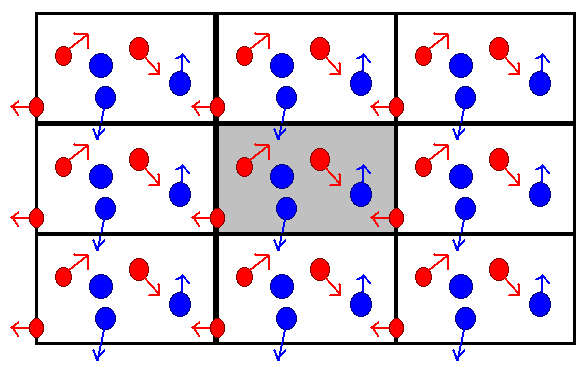

- Se x<0 faremos $ x = x + L$

- Se x>L faremos $ x = x- L$

In [48]:
def pbc(x,L):
    if x < 0:
        xnew = x + L
    elif x > L:
        xnew = x - L
    else:
        xnew = x
    return xnew

In [49]:
pbc(15.0,L) # fora da caixa pela direita

5.0

In [50]:
pbc(-10.0,L) # fora da caixa pela esquerda

0.0

In [51]:
pbc(5.0,L) # dentro da caixa

5.0

Função `rint` faz o mesmo trabalho

In [52]:
15.0 - np.rint(15.0/L)*L

np.float64(-5.0)

In [53]:
-10.0 - np.rint(-10.0/L)*L

np.float64(0.0)

Incluindo a condição de contorno periódica

In [56]:
def interacao_total_cutoff_pbc(r,L,epsilon=1.0,sigma=1.0,rcut=2.5):
    U = 0.0
    for i in range(r.shape[0]):
        for j in range(i+1,r.shape[0]):
            rij = r[i]-r[j]
            # aplicando pbc
            rij[0] -= np.rint(rij[0]/L)*L # em x
            rij[1] -= np.rint(rij[1]/L)*L # em y
            # calcula distancia entre duas particulas
            rij_norm = np.linalg.norm(rij)
            if rij_norm < rcut:
                # calcula energia interna
                U += ulj(rij_norm,epsilon,sigma)
    return U

In [57]:
interacao_total_cutoff_pbc(r,L)

np.float64(-14.479835166719981)

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Crie uma função que calcule a energia do sistema mudando o tamanho da rede quadrada $L$;

> Faça um gráfico de $U$ como função de $L$

Text(0.5, 1.0, 'Energia Total de LJ numa rede quadrada')

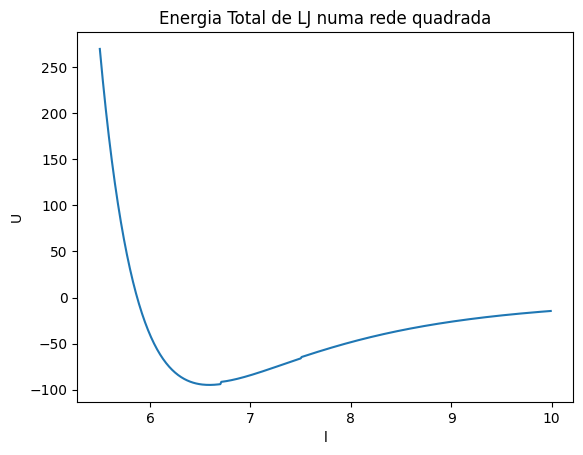

In [62]:
# array com tamanhos da rede quadrada
larray = np.arange(5.5,10.0,0.01)
# array de energias totais
Uarray = np.zeros_like(larray)

for i, l in enumerate(larray):
  r = rede_quadrada(Np,l)
  Uarray[i] = interacao_total_cutoff_pbc(r,l)

# grafico de U como função de l
plt.plot(larray,Uarray)
plt.xlabel('l')
plt.ylabel('U')
plt.title('Energia Total de LJ numa rede quadrada')

## Calculando Forças entre Partículas

Vamos calcular a força total que atua sobre a partícula $i$ a partir do gradiente da energia potencial

$$ \boldsymbol{F}_i = - \nabla_i U_{int} = - \frac{1}{2}\sum_{k} \sum_{j \neq k} \frac{\partial u(r_{kj})}{\partial r_{kj}} \frac{\partial r_{kj}}{\partial \boldsymbol{r}_i}=-\frac{1}{2}\sum_{k} \sum_{j \neq k} \frac{\partial u(r_{kj})}{\partial r_{kj}} \frac{(\delta_{ki}-\delta_{ij})(\boldsymbol{r}_k -\boldsymbol{r}_j)}{ |\boldsymbol{r}_k-\boldsymbol{r}_j|}$$

de modo que

$$ \boldsymbol{F}_i = -\sum_{j \neq i} \frac{\partial u(r_{ij})}{\partial r_{ij}} \frac{\boldsymbol{r}_{ij}}{ \boldsymbol{r}_{ij}}$$

com $\boldsymbol{r}_{ij} = \boldsymbol{r}_{i} - \boldsymbol{r}_{j}$ sendo o vetor posição relativa da partícula $i$ vista da partícula $j$.

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Implemente a função que calcula a derivada do potencial de LJ:  $ \frac{\partial u(r)}{\partial r}$

In [64]:
def duljdr(r,epsilon=1.0,sigma=1.0):
    return -4*epsilon*((12*(sigma/r)**12-6*(sigma/r)**6)/r)

Função que calcula energia e aceleração de LJ

In [67]:
def lennardjones2d(r,L,epsilon=1.0,sigma=1.0,rcut=2.5):
    U = 0.0
    a = np.zeros_like(r)
    for i in range(r.shape[0]):
        for j in range(i+1,r.shape[0]):
            rij = r[i]-r[j]
            # aplicando pbc
            rij[0] -= np.rint(rij[0]/L)*L # em x
            rij[1] -= np.rint(rij[1]/L)*L # em y
            # calcula distancia entre duas particulas
            rij_norm = np.linalg.norm(rij)
            if rij_norm < rcut:
                # calcula energia interna
                U += ulj(rij_norm,epsilon,sigma)
                # calcula a derivada do potencial
                dudr = duljdr(rij_norm,epsilon,sigma)
                # calcula aceleração na particula i
                a[i][0] += -dudr*rij[0]/rij_norm
                a[i][1] += -dudr*rij[1]/rij_norm
                # calcula aceleração na particula j usando 3ª Lei de Newton
                a[j][0] += dudr*rij[0]/rij_norm
                a[j][1] += dudr*rij[1]/rij_norm
    return U, a

In [69]:
U,a = lennardjones2d(r,L=10.0)

U, a

(np.float64(-14.481064717518436),
 array([[ 2.44701385e-02,  2.44701385e-02],
        [ 2.44930567e-02, -1.49880108e-15],
        [ 2.44930567e-02,  3.88578059e-15],
        [ 2.44930567e-02, -4.66987560e-15],
        [ 2.44930567e-02,  4.66987560e-15],
        [ 2.44701385e-02, -2.44701385e-02],
        [-1.52655666e-15,  2.44930567e-02],
        [-1.56125113e-15, -1.51961776e-15],
        [-1.53349555e-15,  3.87884169e-15],
        [-1.49186219e-15, -4.68375339e-15],
        [-1.42247325e-15,  4.68375339e-15],
        [-1.55431223e-15, -2.44930567e-02],
        [ 3.91353616e-15,  2.44930567e-02],
        [ 3.87190280e-15, -1.54043445e-15],
        [ 3.99680289e-15,  3.97598621e-15],
        [ 3.93435284e-15, -4.68375339e-15],
        [ 3.88578059e-15,  4.68375339e-15],
        [ 3.88578059e-15, -2.44930567e-02],
        [-4.64212002e-15,  2.44930567e-02],
        [-4.69763117e-15, -1.47798440e-15],
        [-4.68375339e-15,  3.98292510e-15],
        [-4.67681449e-15, -4.72538675e-15]

## Especificando a partícula

**Ex:** Para Ar (argônio) temos
- $\sigma = 3,4\ \AA$
- $\epsilon/k_B = 119,8$ K

In [70]:
sigma_Ar = 3.4 # em Angstrom
epsilon_Ar = 119.8 # em Kelvin

In [72]:
U, a =  lennardjones2d(r,L=10.0,epsilon=epsilon_Ar,sigma=sigma_Ar)

print(U)

179301990.6593951


## Generalizando para 3D

Definindo o número de partículas

In [75]:
Np = 216

Colocando as partículas em posições numa rede cúbica

In [76]:
def rede_cubica(Np, L):
    # array como posições das partículas
    r = np.zeros((Np,3))
    # Número de pontos em x e y
    Nx = Ny = Nz = int(np.ceil(np.power(Np,1/3.0)))

    # Espaçamento entre os átomos
    dx = L/Nx
    dy = L/Ny
    dz = L/Nz

    # Posições possíveis em x e y
    id = 0
    for i in range(Nx):
        for j in range(Ny):
            for k in range(Nz):
                if (id < Np):
                    r[id][0] = (i+0.5)*dx
                    r[id][1] = (j+0.5)*dy
                    r[id][2] = (k+0.5)*dz
                    id +=1
    return r

In [77]:
r = rede_cubica(Np,L)

In [79]:
def lennardjones3d(r,L,epsilon=1.0,sigma=1.0,rcut=2.5):
    U = 0.0
    a = np.zeros_like(r)
    for i in range(r.shape[0]):
        for j in range(i+1,r.shape[0]):
            rij = r[i]-r[j]
            # aplicando pbc
            rij[0] -= np.rint(rij[0]/L)*L # em x
            rij[1] -= np.rint(rij[1]/L)*L # em y
            rij[2] -= np.rint(rij[2]/L)*L # em z
            # calcula distancia entre duas particulas
            rij_norm = np.linalg.norm(rij)
            if rij_norm < rcut:
                # calcula energia interna
                U += ulj(rij_norm,epsilon,sigma)
                # calcula a derivada do potencial
                dudr = duljdr(rij_norm,epsilon,sigma)
                # calcula aceleração na particula i
                a[i][0] += -dudr*rij[0]/rij_norm
                a[i][1] += -dudr*rij[1]/rij_norm
                a[i][2] += -dudr*rij[2]/rij_norm
                # calcula aceleração na particula j usando 3ª Lei de Newton
                a[j][0] += dudr*rij[0]/rij_norm
                a[j][1] += dudr*rij[1]/rij_norm
                a[j][2] += dudr*rij[2]/rij_norm
    return U, a

Calcula a energia e as acelerações

In [83]:
U0, a0 = lennardjones3d(r,L=10.0)

U0, a0

(np.float64(-145.34690081587095),
 array([[-8.32667268e-16, -8.04911693e-16, -7.77156117e-16],
        [-7.49400542e-16, -7.21644966e-16, -1.59594560e-15],
        [-7.49400542e-16, -7.21644966e-16,  0.00000000e+00],
        [-8.32667268e-16, -8.04911693e-16,  2.37310172e-15],
        [-8.60422844e-16, -8.32667268e-16, -4.77395901e-15],
        [-8.60422844e-16, -8.32667268e-16,  4.77395901e-15],
        [-7.49400542e-16, -1.56819002e-15, -7.56339436e-16],
        [-6.66133815e-16, -1.66533454e-15, -1.63064007e-15],
        [-6.66133815e-16, -1.77635684e-15,  0.00000000e+00],
        [-7.49400542e-16, -1.65839564e-15,  2.38697950e-15],
        [-7.77156117e-16, -1.60982339e-15, -4.78783679e-15],
        [-7.77156117e-16, -1.57512892e-15,  4.78783679e-15],
        [-7.49400542e-16,  6.93889390e-18, -7.56339436e-16],
        [-6.66133815e-16,  2.08166817e-17, -1.74166237e-15],
        [-7.77156117e-16,  2.08166817e-17,  0.00000000e+00],
        [-8.60422844e-16,  2.77555756e-17,  2.49800

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Implemente uma função que calcula a energia de LJ para a rede cúbica e calcule para vários valores de tamanho da rede $L$.

> Faça um gráfico de $U$ como função de $L$

Text(0.5, 1.0, 'Energia Total de LJ numa rede cúbica')

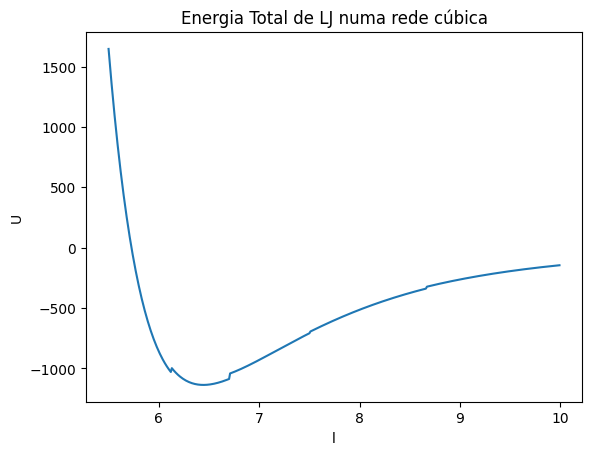

In [86]:
# array com tamanhos da rede cubica simples
larray = np.arange(5.5,10.0,0.01)
# array de energias totais
Uarray = np.zeros_like(larray)

for i, l in enumerate(larray):
  r = rede_cubica(Np,l)
  U, a = lennardjones3d(r,l)
  Uarray[i] = U

# grafico de U como função de l
plt.plot(larray,Uarray)
plt.xlabel('l')
plt.ylabel('U')
plt.title('Energia Total de LJ numa rede cúbica')